# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [ ]:
import numpy
import pandas as pd
import matplotlib

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [34]:
import pandas as pd
grades = pd.read_csv('../data/states_edu.csv')
print(grades)

             PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659028.0       715680.0          

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [36]:
# @@@ 1
# Your Code
num_years = grades["YEAR"].unique
print(num_years)

<bound method Series.unique of 0       1992
1       1992
2       1992
3       1992
4       1992
        ... 
1710    2019
1711    2019
1712    2019
1713    2019
1714    2019
Name: YEAR, Length: 1715, dtype: int64>


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [52]:
# @@@ 2
MI_OH = grades[grades["STATE"].isin(["MICHIGAN", "OHIO"])]
bigger_avg = MI_OH.groupby('STATE')[["TOTAL_REVENUE", "TOTAL_EXPENDITURE"]].mean()
print(bigger_avg)

          TOTAL_REVENUE  TOTAL_EXPENDITURE
STATE                                     
MICHIGAN    16877091.20        17026245.84
OHIO        18140644.36        17775446.24


Find the average for your chosen test across all states in 2019

In [78]:
# @@@ 3
grades_2019 = grades[grades["YEAR"] == 2019]
test_2019 = grades_2019["AVG_MATH_4_SCORE"].mean()
print (test_2019)

239.9433962264151


For each state, find a maximum value for your chosen test score

In [109]:
# @@@ 4
max_test = grades.groupby("STATE")["AVG_MATH_4_SCORE"].max()
print (max_test)

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
# @@@ 5
grades["expenditure_per_student"] = grades["TOTAL_EXPENDITURE"] / grades["GRADES_ALL_G"]

# I made this chnage because it allows us to see if a student that receives more money has a higher academic performance thant a state that spends more money overall on the students


0       3.627221
1       7.939520
2       5.050774
3       3.948044
4       5.164536
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Name: expenditure_per_student, Length: 1715, dtype: float64


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average 8th Grade Math Score')

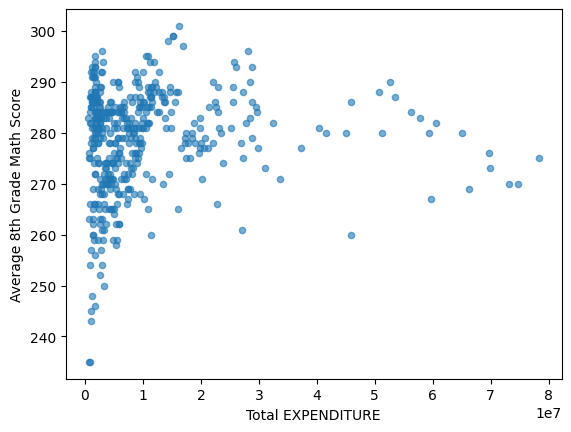

In [185]:
# @@@ 6
import matplotlib.pyplot as plt
import seaborn as sns

grades.plot.scatter(x='TOTAL_EXPENDITURE', y='AVG_MATH_8_SCORE', alpha=.6)
plt.xlabel("Total EXPENDITURE")
plt.ylabel("Average 8th Grade Math Score")



**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0, 0.5, 'Average 8th Grade Math Score')

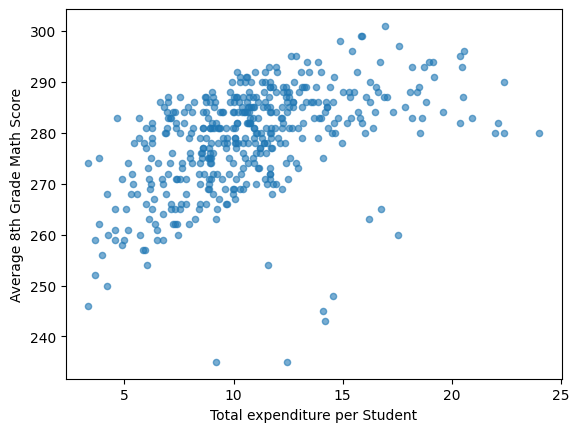

In [ ]:
# @@@ 7
grades.plot.scatter(x='expenditure_per_student', y='AVG_MATH_8_SCORE', alpha=.6)
plt.xlabel("Total expenditure per Student")
plt.ylabel("Average 8th Grade Math Score")

# Based on what I am seeing there is a correlation in which the more money spent on a student the higher their math score. With some obvious outliers

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
# @@@ 8
model_data = grades[["expenditure_per_student", "TOTAL_REVENUE", "AVG_MATH_8_SCORE"]].dropna()
X = model_data[["expenditure_per_student", "TOTAL_REVENUE"]]
y = model_data["AVG_MATH_8_SCORE"]

In [221]:
# @@@ 9 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size= .2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [222]:
# @@@ 10
# import your sklearn class here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


print("R^2 score on test data:", model.score(X_test, y_test))
print("Mean error:", np.mean(model.predict(X_test) - y_test))
print("Mean absolute error:", np.mean(np.abs(model.predict(X_test) - y_test)))
print("Root mean squared error:", np.mean((model.predict(X_test) - y_test)**2)**0.5)


col_name = 'AVG_MATH_8_SCORE'




Intercept: 265.5708491579952
Coefficients: [ 1.30094754e+00 -4.56591416e-08]
R^2 score on test data: 0.19283062135696816
Mean error: 2.158121641166837
Mean absolute error: 7.527884483297201
Root mean squared error: 10.102728816194471


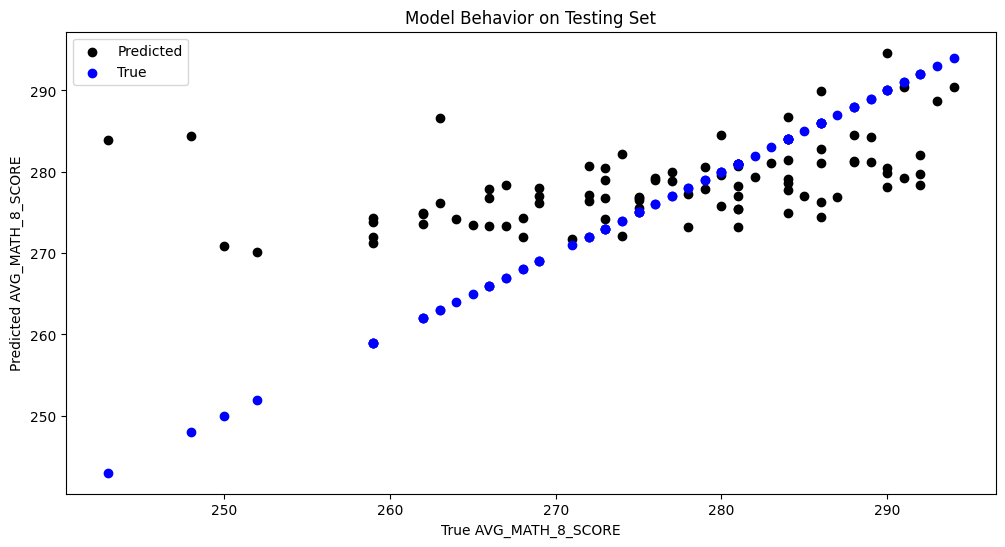

In [223]:
# @@@ 11
# create your model here
# model = 
plt.figure(figsize=(12,6))
plt.scatter(y_test, model.predict(X_test), color="black")
plt.scatter(y_test, y_test, color="blue")  # perfect predictions line
plt.legend(['Predicted','True'])
plt.xlabel("True " + col_name)
plt.ylabel("Predicted " + col_name)
plt.title("Model Behavior on Testing Set")
plt.show()

In [224]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [225]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [230]:
# @@@ 12
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

mean_error = np.mean(y_pred - y_test)
print("Mean Error:", mean_error)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


R^2 Score: 0.19283062135696816
Mean Error: 2.158121641166837
Mean Absolute Error: 7.527884483297201
Root Mean Squared Error: 10.102728816194471


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

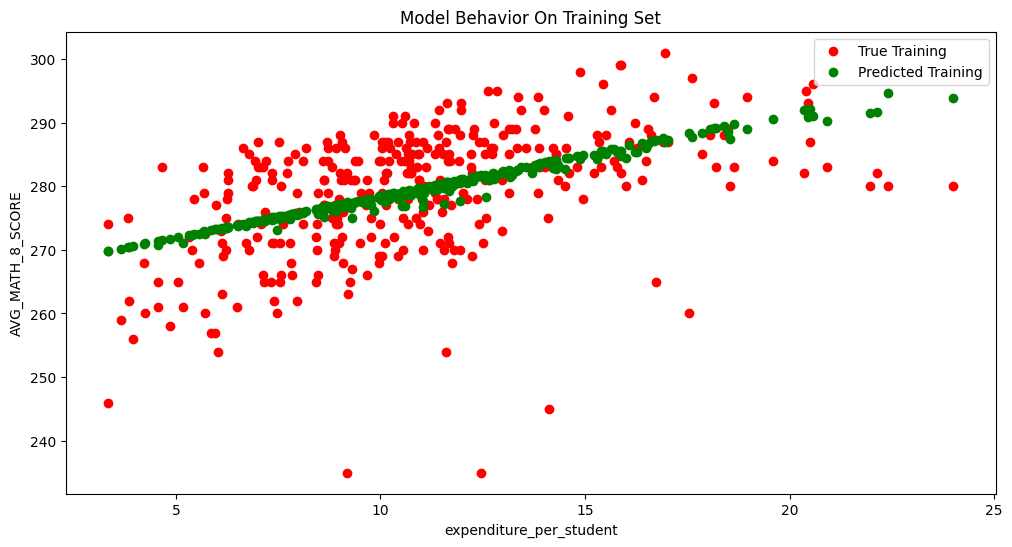

In [233]:
# @@@ 13

col_name = 'expenditure_per_student'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

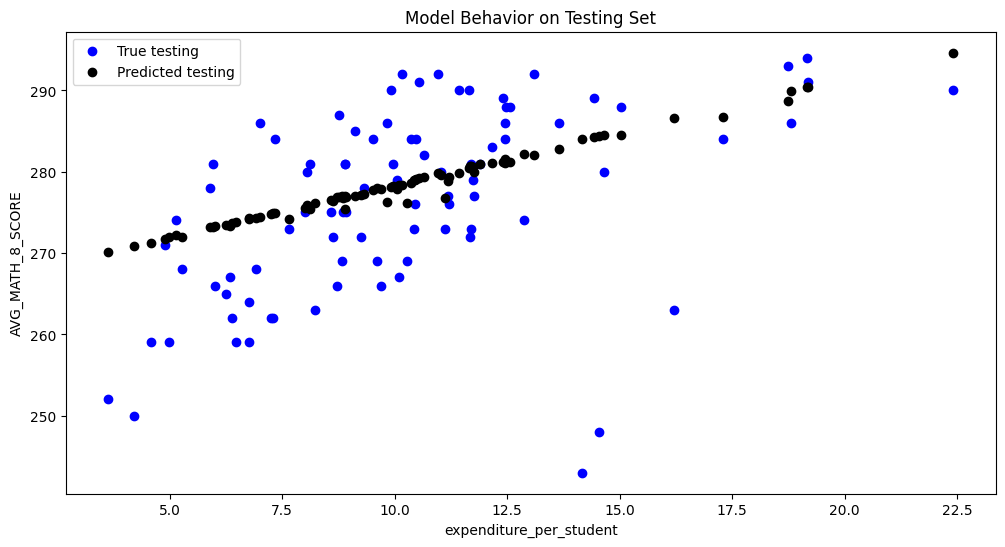

In [236]:
# @@@ 14

col_name = 'expenditure_per_student'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")